# CS109a Final Project: Group 90 <br>Predicting damage of US storms<br>
### Data Science 1: CS 109A/STAT 121A/AC 209A/ E 109A <br> Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave
#### Harvard University <br> Fall 2017 <br> 
#### Date: December 7, 2017<br> Written By: George Hu, Manav Khandelwal, Josh Kuppersmith Evan Mackay <br> 

---




In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from zipcode
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Part 1: Loading In Data

In [2]:
# load in all data for 2016 and 2017

details_2016 = pd.read_csv('Details_2016.csv')
details_2017 = pd.read_csv('Details_2017.csv')
locations_2016 = pd.read_csv('Locations_2016.csv')
locations_2017 = pd.read_csv('Locations_2017.csv')
#fatalities_2016 = pd.read_csv('Fatalities_2016.csv')
#fatalities_2017 = pd.read_csv('Fatalities_2017.csv')

print(details_2016.shape)
details_2016.head()

(55964, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


In [3]:
# vertically merge

details = pd.concat([details_2016, details_2017])
locations = pd.concat([locations_2016, locations_2017])
#fatalities = pd.concat([fatalities_2016, fatalities_2017])

print(details.shape)
details.head()

(103177, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


# Part 2: Preliminary Data Analysis and Cleaning

In [4]:
# look at column names

print(list(details.columns))
print()
print(list(locations.columns))
print()
#print(list(fatalities.columns))

['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']

['YEARMONTH', 'EPISODE_ID', 'EVENT_ID', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2']



In [5]:
# re-format Property and Crop Damage

print(details['DAMAGE_PROPERTY'][details['DAMAGE_PROPERTY'].isnull()].size)

damage_property = []
for i in details["DAMAGE_PROPERTY"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_property.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_property.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_property.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_property.append(dam)
                except:
                    print(i)
                    
damage_crops = []
for i in details["DAMAGE_CROPS"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_crops.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_crops.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_crops.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_crops.append(dam)
                except:
                    print(i)
                    
details["DAMAGE_PROPERTY"] = damage_property
details["DAMAGE_CROPS"] = damage_crops

print(details['DAMAGE_PROPERTY'][details['DAMAGE_PROPERTY'].isnull()].size)
        
# create new Total Damage Column
    
details['DAMAGE_TOTAL'] = details['DAMAGE_PROPERTY'] + details['DAMAGE_CROPS']

20501
20501


In [48]:
# Make new categorical column for has_damage

has_damage = []
for x in details['DAMAGE_PROPERTY']:
    if x > 0.0:
        has_damage.append(1)
    else:
        has_damage.append(0)

details['HAS_DAMAGE'] = has_damage
details['HAS_DAMAGE'].head()

NameError: name 'details' is not defined

In [7]:
# merge details and location data

data = pd.merge(details, locations, how='inner', on=['EPISODE_ID', 'EVENT_ID'])
print(data.shape)
data.head()

## NOTE: possibility to merge on fatalities, but there are very few (766) so this would be a special case model
## perhaps use for some final added analysis
## data = pd.merge(data1, fatalities, how='inner', on=['EVENT_ID'])

(87563, 62)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,DAMAGE_TOTAL,HAS_DAMAGE,YEARMONTH,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.0,0.0,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,0.0,0,201603,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1000.0,0.0,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,1000.0,1,201603,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.0,0.0,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,0.0,0,201607,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.0,0.0,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,0.0,0,201607,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.0,0.0,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,0.0,0,201607,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032


# Part 3: Some of our EDA

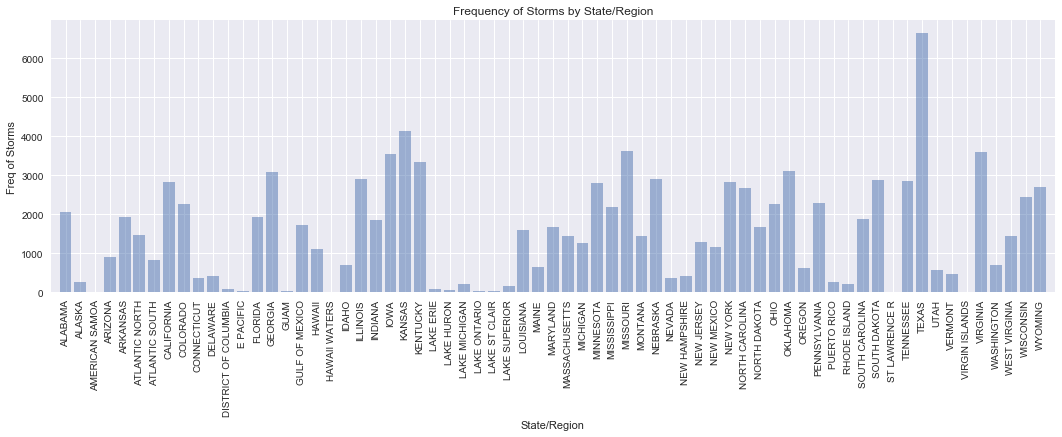

In [8]:
# storm counts by state

import seaborn as sns
sns.set(color_codes=True)
storm_counts_loc = np.unique(details['STATE'], return_counts=True)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(67), storm_counts_loc[1], align='center', alpha=0.5)
ax.set_xlim([-1, 67])
ax.set_xticks(range(67))
ax.set_xticklabels(storm_counts_loc[0], rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by State/Region')

plt.show()

(array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'], dtype=object), array([10699,  9110,  4514,  8680,  8563, 16912, 13249, 10688, 13064,
        2066,  2349,  3283]))


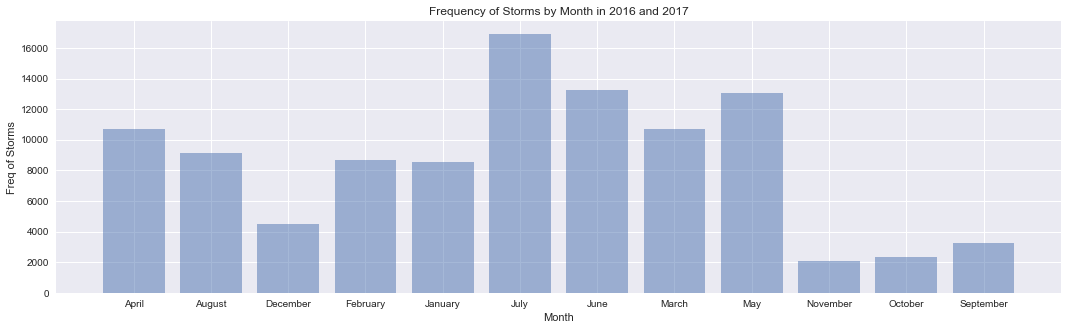

In [9]:
# storm count by month

storm_counts_mo = np.unique(details['MONTH_NAME'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(12), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Month in 2016 and 2017')

plt.show()

(array([2016, 2017]), array([55964, 47213]))


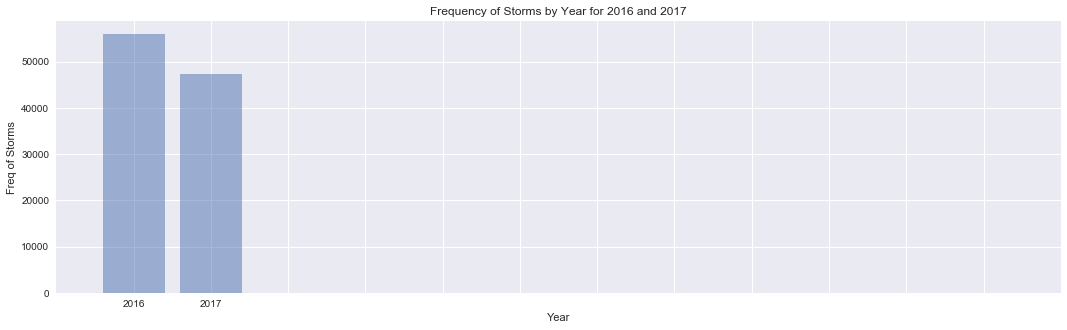

In [10]:
# storm count by year

storm_counts_mo = np.unique(details['YEAR'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(2), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Year')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Year for 2016 and 2017')

plt.show()

In [11]:
# EDA, out of storms with damage, where are they occuring

damage_data = data[data['HAS_DAMAGE'] == 1]
print(len(damage_data))

24940


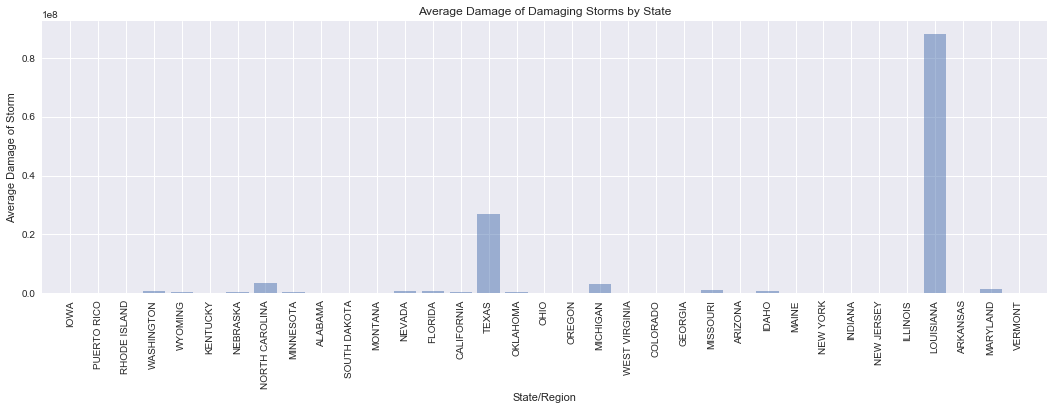

In [12]:
# display average damage per state given causes damage

sns.set(color_codes=True)

states = list(set(damage_data['STATE'].values))

states_final = []
ave_per_state = []
for i in range(len(states)):
    state = states[i]
    state_damage = damage_data[damage_data['STATE'] == state]['DAMAGE_TOTAL']
    if len(state_damage) > 10:
        ave = np.mean(state_damage)
        states_final.append(state)
        ave_per_state.append(ave)
        
# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(ave_per_state)), ave_per_state, align='center', alpha=0.5)
ax.set_xlim([-1, 35])
ax.set_xticks(range(35))
ax.set_xticklabels(states_final, rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by State')

plt.show()

['Marine Thunderstorm Wind', 'Funnel Cloud', 'Flood', 'Debris Flow', 'Tornado', 'Waterspout', 'Marine Strong Wind', 'Heavy Rain', 'Hail', 'Dust Devil', 'Thunderstorm Wind', 'Lightning', 'Flash Flood']


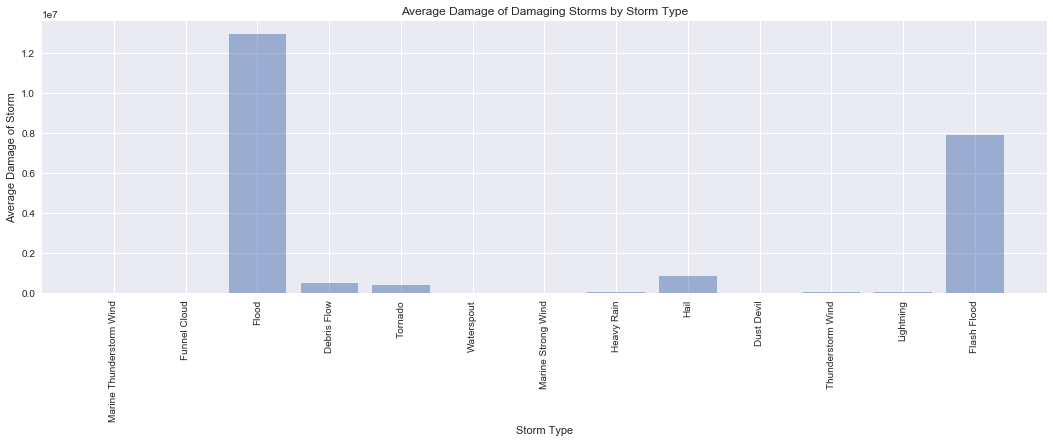

In [13]:
# display average damage per storm type given causes damage

sns.set(color_codes=True)

storm_types = list(set(damage_data['EVENT_TYPE'].values))
print(storm_types)

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = damage_data[damage_data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

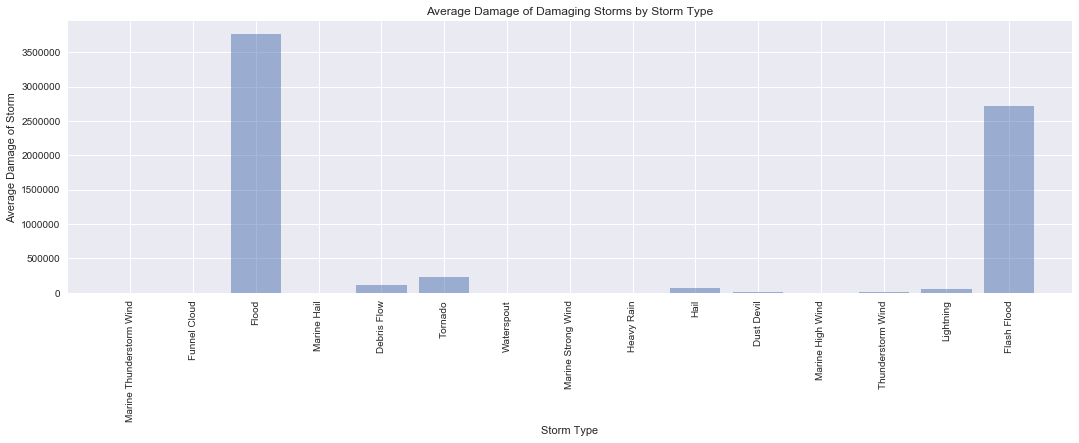

In [14]:
# display average damage per storm type without conditioning on damage causing

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

# Part 4: More Cleaning and *Handling of Nulls*

In [15]:
# These are the storms that don't have magnitude
np.unique(data[data.MAGNITUDE.isnull()]["EVENT_TYPE"], return_counts=True)

(array(['Debris Flow', 'Dust Devil', 'Flash Flood', 'Flood', 'Funnel Cloud',
        'Heavy Rain', 'Lightning', 'Tornado', 'Waterspout'], dtype=object),
 array([  626,    19, 22544, 13463,   445,  2706,   596,  3067,   379]))

In [16]:
# drop null rows and check if any null values remaining
# MORE ROBUST

print(data.shape)
# Replace NA magnitudes with 0
data["MAGNITUDE"] = data.MAGNITUDE.fillna(value=0)
data.dropna(inplace=True, subset = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS','BEGIN_YEARMONTH', 'YEAR','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE'])      
print(data.shape)

# deleted 13400 rows

(87563, 62)
(74161, 62)


### EDA on Our Response Variable

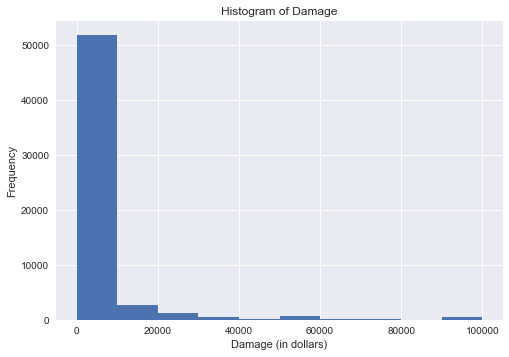

In [17]:
data["DAMAGE_PROPERTY"] = pd.Series(damage_property)
plt.hist(x=data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY <= 100000])
plt.xlabel("Damage (in dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [18]:
np.corrcoef(data["DAMAGE_TOTAL"],data["DEATHS_DIRECT"])

array([[ 1.        ,  0.53652199],
       [ 0.53652199,  1.        ]])

In [19]:
# validation of our damage estimates
data.DAMAGE_TOTAL[data.DAMAGE_TOTAL > 100000].shape

(3492,)

In [20]:
import scipy.stats as ss
print("Mean: {}".format(round(np.mean(data.DAMAGE_TOTAL)),4))
print("Median: {}".format(np.median(data.DAMAGE_TOTAL)))
print("Skew: {}".format(round(ss.skew(data.DAMAGE_TOTAL),2)))

Mean: 1530613
Median: 0.0
Skew: 46.34


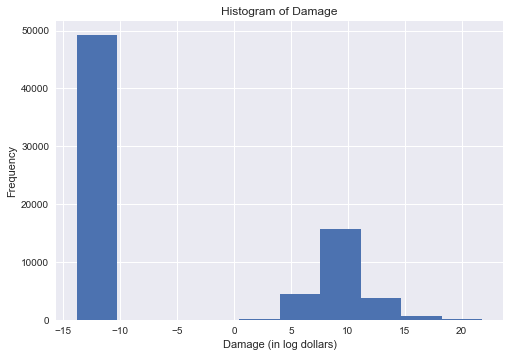

In [21]:
# we see our big concentration at 0, and a (hopefully) near-normal distribution otherwise

plt.hist(x=np.log(data.DAMAGE_TOTAL + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

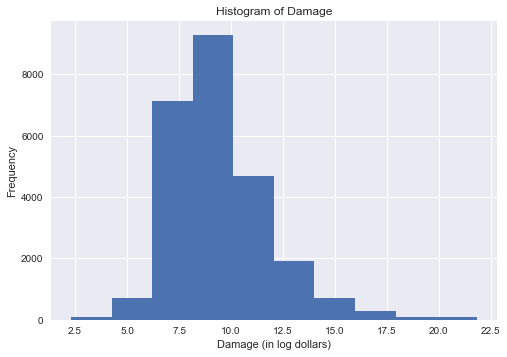

In [22]:
# confirming near-normal response for data with a damage over 0

plt.hist(x=np.log(data.DAMAGE_TOTAL[data.DAMAGE_TOTAL>0] + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

# Part 5: Zipcode + Demographic Data

In [73]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

def calc_density(row):
    zipcode = search.by_coordinate(row['LATITUDE'], row['LONGITUDE'], radius=50)
    if (int(row.name) % 1000 == 0):
        print(row.name)
    try: 
        zc = zipcode[0]
        return zc.Density
    except:
        return np.nan

def calc_popul(row):
    zipcode = search.by_coordinate(row['LATITUDE'], row['LONGITUDE'], radius=50)
    try:
        zc = zipcode[0]
        return zc.Population
    except:
        return np.nan

def calc_wealth(row):
    zipcode = search.by_coordinate(row['LATITUDE'], row['LONGITUDE'], radius=50)
    try:
        zc = zipcode[0]
        return zc.Wealthy
    except:
        return np.nan

In [ ]:
# DO NOT RUN AGAIN, SINCE WE SAVE TO A CSV BELOW

data['DENSITY'] = data.apply(calc_density, axis=1)
data['POPULATION'] = data.apply(calc_popul, axis=1)
data['HH_INCOME'] = data.apply(calc_wealth, axis=1)

In [ ]:
data.to_csv("model_data_full.csv")

# Part 6: More EDA

In [ ]:
## Focus on EDA to see what from the zipcode data might be useful

# Part 7: Prepare Predictors + Final Cleaning

In [24]:
data.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'DAMAGE_TOTAL', 'HAS_DAMAGE', 'YEARMONTH', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2'],
      dtype='object')

In [3]:
data = pd.read_csv('model_data_full.csv')
# Comment out if needed
data.dropna(inplace=True, subset = ['DENSITY', 'POPULATION', 'HH_INCOME'])      

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def getmonth(row):
    return int(str(row["BEGIN_YEARMONTH"])[-2:])

def getyear(row):
    return int(str(row["BEGIN_YEARMONTH"])[:4])

data["MONTH"] = data.apply(getmonth,axis=1)
data["YEAR"] = data.apply(getyear,axis=1)
#data = data.drop(['Unnamed: 0',"BEGIN_YEARMONTH","END_YEARMONTH","LAT2","LON2",
#                  "YEARMONTH","CZ_FIPS","CZ_TYPE","CZ_NAME",
#                  "WFO","MAGNITUDE_TYPE","FLOOD_CAUSE",'CATEGORY', 'TOR_F_SCALE', 
#                  'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
#                  'TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME',
#                  'EPISODE_NARRATIVE', 'EVENT_NARRATIVE'],axis=1)

In [5]:
data.columns

Index(['Unnamed: 0', 'BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'DAMAGE_TOTAL', 'HAS_DAMAGE', 'YEARMONTH', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2', 'DENSITY', 'POPULATION', 'HH_INCOME', 'MONTH'],
      dtype='object')

In [6]:
X = data.drop("HAS_DAMAGE",axis=1)
y = data['HAS_DAMAGE']

# drop 3 rows where household income is "infinity"
drop_indices = []
for i in range(len(X)):
    if not np.isfinite(X['HH_INCOME'].iloc[i]):
        drop_indices.append(i)

print(len(X))
X = X.drop(X.index[drop_indices])
y = y.drop(y.index[drop_indices])
#y = y.drop(drop_indices, axis=0)
print(len(X))

65447
65443


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Part 8: Preliminary Classification Model

In [8]:
# fit prelim model


        
#for col in list(X_train.columns):
#    for i in X_train[col]:
#        if not np.isfinite(i):
#            print(i)
#            print(col)

#print(list(set(X_train.columns.values)))

print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

basic_cols = ['EVENT_TYPE', 'STATE', 'MAGNITUDE', 'CZ_TIMEZONE', 'RANGE', 'LATITUDE', 'LONGITUDE']
X_train_basic = X_train[basic_cols]
X_test_basic = X_test[basic_cols]

X_train_basic = pd.get_dummies(X_train_basic, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)
X_test_basic = pd.get_dummies(X_test_basic, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)

#print(X_train[X_train.isnull().any(axis=1)].size)
#print(y_train[y_train.isnull()].size)
#print(X_test[X_test.isnull().any(axis=1)].size)
#print(y_test[y_test.isnull()].size)

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_basic, y_train)
train_pred = model.predict(X_train_basic)
test_pred = model.predict(X_test_basic)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_basic)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 42822
Num points with damage: 22625

Training Accuracy: 0.759955298089
Testing Accuracy: 0.758438672038
True Positive Rate:  0.538778768126
True Negative Rate:  0.875710227273
AUC:  0.818954186798


# Part 9: Improving Classification Model

## PREDICTOR INTUITION

BEGIN_TIME: time of day could be helpful, helps accuracy. think about duration! (NORMALIZE)

STATE: geographical significance (ONE-HOT) // TAKING OUT

CZ_TYPE: C is county, Z is over water, significant predictor (ONE-HOT)

YEAR: doesn't do a ton, but helps accuracy slightly (ONE-HOT)

MONTH_NAME: EDA showed months correlating with damage frequency (ONE-HOT)

WFO: weather forecast office- another way to break down geographically by main metropolitan areas (ONE-HOT)

EVENT_TYPE: type of storm. highly predictive (ONE-HOT)

LATITUDE: geographical inuition (AS IS) // TAKING OUT

LONGITUDE: geographical inuition (AS IS) // TAKING OUT

AZIMUTH: direction of storm, helps very slightly (ONE-HOT)

DENSITY: helps when normalized, not great (NORMALIZE)

POPULATION: helps when normalized, not great (NORMALIZE)

HH_INCOME: helps when normalized, not great (NORMALIZE)

In [42]:
# BETTER SELECTION OF PREDICTORS
full_cols = ['BEGIN_TIME', 'CZ_TYPE', 'YEAR',
             'WFO', 'EVENT_TYPE', 'MONTH_NAME',
             'AZIMUTH', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_full = X_train[full_cols]
X_test_full = X_test[full_cols]

# standardize the numerical predictors
for i in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    train_mean = X_train_full[i].mean()
    train_sd = X_train_full[i].std()
    X_train_full[i] = (X_train_full[i] - train_mean) / train_sd
    X_test_full[i] = (X_test_full[i] - train_mean) / train_sd

X_train_full = pd.get_dummies(X_train_full, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)
X_test_full = pd.get_dummies(X_test_full, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [43]:
print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_full, y_train)
train_pred = model.predict(X_train_full)
test_pred = model.predict(X_test_full)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_full)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 42822
Num points with damage: 22625

Training Accuracy: 0.828445012088
Testing Accuracy: 0.820160207436
True Positive Rate:  0.690967141147
True Negative Rate:  0.889133522727
AUC:  0.893158641549


## ADDING COMPLEX EFFECTS

In [49]:
# MAKE SURE INTERACTION BETWEEN MAGNITUDE AND EVENT TYPE
X_train_complex = copy.deepcopy(X_train_full)
X_test_complex = copy.deepcopy(X_test_full)

# hardcode interaction term
for event_type in ['EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood', 
            'EVENT_TYPE_Funnel Cloud', 'EVENT_TYPE_Hail', 'EVENT_TYPE_Heavy Rain', 
            'EVENT_TYPE_Lightning', 'EVENT_TYPE_Marine Hail', 'EVENT_TYPE_Marine High Wind', 
            'EVENT_TYPE_Marine Strong Wind', 'EVENT_TYPE_Marine Thunderstorm Wind', 
            'EVENT_TYPE_Thunderstorm Wind', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Waterspout']:
    X_train_complex[event_type + "*MAGNITUDE"] = X_train_complex[event_type]*X_train["MAGNITUDE"]
    X_test_complex[event_type + "*MAGNITUDE"] = X_test_complex[event_type]*X_test["MAGNITUDE"]
    
X_train_complex["HH_INCOME*DENSITY"] = X_train_complex["DENSITY"]*X_train_complex["HH_INCOME"]
X_train_complex["HH_INCOME*POPULATION"] = X_train_complex["POPULATION"]*X_train_complex["HH_INCOME"]
X_train_complex["DENSITY*POPULATION"] = X_train_complex["POPULATION"]*X_train_complex["DENSITY"]
X_test_complex["HH_INCOME*DENSITY"] = X_test_complex["DENSITY"]*X_test_complex["HH_INCOME"]
X_test_complex["HH_INCOME*POPULATION"] = X_test_complex["POPULATION"]*X_test_complex["HH_INCOME"]
X_test_complex["DENSITY*POPULATION"] = X_test_complex["POPULATION"]*X_test_complex["DENSITY"]

In [50]:
model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_complex, y_train)
train_pred = model.predict(X_train_complex)
test_pred = model.predict(X_test_complex)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.830338001186
Testing Accuracy: 0.822012316525
True Positive Rate:  0.693228681655
True Negative Rate:  0.890767045455
AUC:  0.898780623768


### k-NN

In [55]:
# max_score = 0
# max_k = 0 

# for k in range(15,31,3):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     score = cross_val_score(knn,X_train_complex,y_train).mean()
#     if score > max_score:
#         max_k = k
#         max_score = score
# print(max_k)
#  #max_k = 15

In [56]:
model_knn = KNeighborsClassifier(n_neighbors = max_k)
model_knn.fit(X_train_complex, y_train)
train_pred = model_knn.predict(X_train_complex)
test_pred = model_knn.predict(X_test_complex)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model_knn.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.871687269078
Testing Accuracy: 0.846228642867
True Positive Rate:  0.725422375948
True Negative Rate:  0.910724431818
AUC:  0.919406594106


### LDA/QDA

In [57]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_complex,y_train)

train_pred = lda.predict(X_train_complex)
test_pred = lda.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = lda.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.824727455184
Testing Accuracy: 0.817937676529
True Positive Rate:  0.68005853399
True Negative Rate:  0.891548295455
AUC:  0.891747484112


/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [58]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_complex,y_train)

train_pred = qda.predict(X_train_complex)
test_pred = qda.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = qda.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Training Accuracy: 0.650230351685
Testing Accuracy: 0.654813168496
True Positive Rate:  0.639084741253
True Negative Rate:  0.663210227273
AUC:  0.66195760254


### Random Forest/Decision Trees

In [71]:
best_score = 0
best_depth = 0
for i in range(80,95):
    dt = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    score = cross_val_score(estimator=dt, X=X_train_complex, y=y_train, cv=5, n_jobs=-1).mean()
    if score > best_score:
        best_score = score
        best_depth = i

In [72]:
best_depth

88

In [ ]:
# GRAPH

In [74]:
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(X_train_complex,y_train)

train_pred = dt.predict(X_train_complex)
test_pred = dt.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = dt.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.999635086439
Testing Accuracy: 0.929342038246
True Positive Rate:  0.897698549953
True Negative Rate:  0.946235795455
AUC:  0.92214520666


In [84]:
# TODO: GINI IMPORTANCE FOR DECISION TREE
treeimportance_df = pd.DataFrame(columns=["Predictor","Importance"])
treeimportance_df["Importance"] = pd.Series(dt.feature_importances_)
treeimportance_df["Predictor"] = pd.Series(X_train_complex.columns)
treeimportance_df.sort_values('Importance',ascending=False)[:20]

,Predictor,Importance
175,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,0.115180
0,BEGIN_TIME,0.084630
1,DENSITY,0.048839
72,WFO_JAN,0.034368
179,HH_INCOME*POPULATION,0.033912
168,EVENT_TYPE_Hail*MAGNITUDE,0.032777
3,HH_INCOME,0.030913
180,DENSITY*POPULATION,0.028557
2,POPULATION,0.027857
178,HH_INCOME*DENSITY,0.024781


In [78]:
# Out-of-bag cross-validation to choose RF number of predictors
best_pred = 0
best_score = 0
for f in [20,40,60,80]:
    est = RandomForestClassifier(oob_score=True, 
                                n_estimators=32, max_features=f, max_depth=best_depth, n_jobs=-1)
    est.fit(X_train_complex, y_train)
    if est.oob_score_ > best_score:
        best_score = est.oob_score_
        best_pred = f

In [79]:
rf = RandomForestClassifier(oob_score=True, n_estimators=64, max_features=best_pred, 
                            max_depth=best_depth, n_jobs=-1)
rf.fit(X_train_complex,y_train)

train_pred = rf.predict(X_train_complex)
test_pred = rf.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = rf.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.999566665146
Testing Accuracy: 0.94716858823
True Positive Rate:  0.910469602235
True Negative Rate:  0.966761363636
AUC:  0.985779926296


### AdaBoost

In [91]:
# TODO: 15 MAX_DEPTH ???
from sklearn.model_selection import GridSearchCV
param_grid_boost = {
              'base_estimator__max_depth': list(range(5,16,2))
}
gb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, learning_rate=.08)
gb_cv = GridSearchCV(gb, param_grid_boost, cv=5, n_jobs=-1)

gb_cv.fit(X_train_complex, y_train)

begb = gb_cv.best_estimator_
begb

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.08, n_estimators=150, random_state=None)

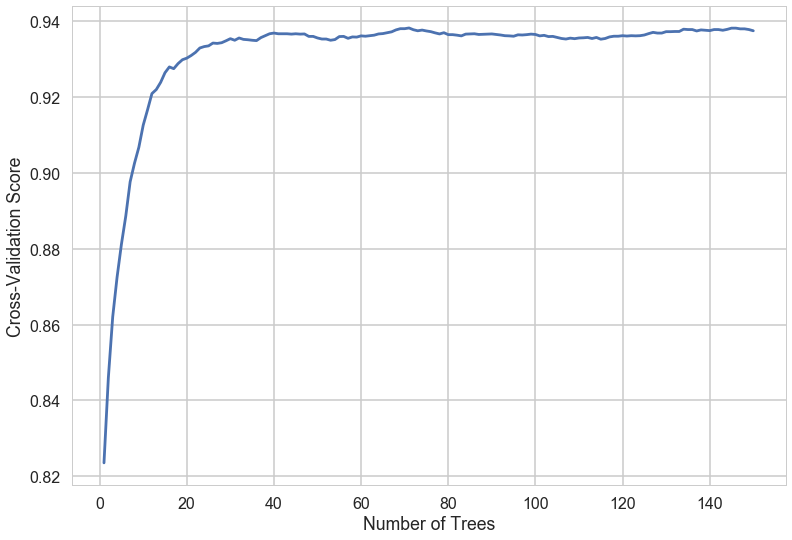

In [95]:
test_scores=[]
for spred in begb.staged_predict(X_test_complex):
    test_scores.append(metrics.accuracy_score(spred, y_test))
plt.plot(range(1, 151), test_scores)
plt.xlabel("Number of Trees")
plt.ylabel("Cross-Validation Score")

In [96]:
print ("Optimal # trees = ", range(1, 150)[np.argmax(test_scores)])
print ("Optimal depth = ", 15) # from begb printout above

Optimal # trees =  71
Optimal depth =  15


In [97]:
gb_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                                  n_estimators=71, learning_rate=.08)
gb_optimized.fit(X_train_complex, y_train)

train_pred = gb_optimized.predict(X_train_complex)
test_pred = gb_optimized.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = gb_optimized.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.999635086439
Testing Accuracy: 0.939436032782
True Positive Rate:  0.901290408408
True Negative Rate:  0.959801136364
AUC:  0.95146428512


# Part 10: Preliminary Regression Model

# Part 11:  Improving Regression Model

# Part 12: Model Analysis and Presentation